In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sample_from_gaussian(max_sigma, loc_interval, n_samples):
    N = 4
    xs = np.array([])
    ys = np.array([])
    ks = np.array([])
    ls = np.array([])
    sigmas = np.linspace(0.8, max_sigma)

    locx = np.random.uniform(loc_interval[0], high=loc_interval[1])
    locy = np.random.uniform(loc_interval[0], high=loc_interval[1])
    lock = np.random.uniform(loc_interval[0], high=loc_interval[1])
    locl = np.random.uniform(loc_interval[0], high=loc_interval[1])

    for i in range(N):
        xs = np.append(xs, np.random.normal(locx, scale=sigmas[i], size=n_samples))
        ys = np.append(ys, np.random.normal(locy, scale=sigmas[i], size=n_samples))
        ks = np.append(ks, np.random.normal(lock, scale=sigmas[i], size=n_samples))
        ls = np.append(ls, np.random.normal(locl, scale=sigmas[i], size=n_samples))
    
    return xs, ys, ks, ls

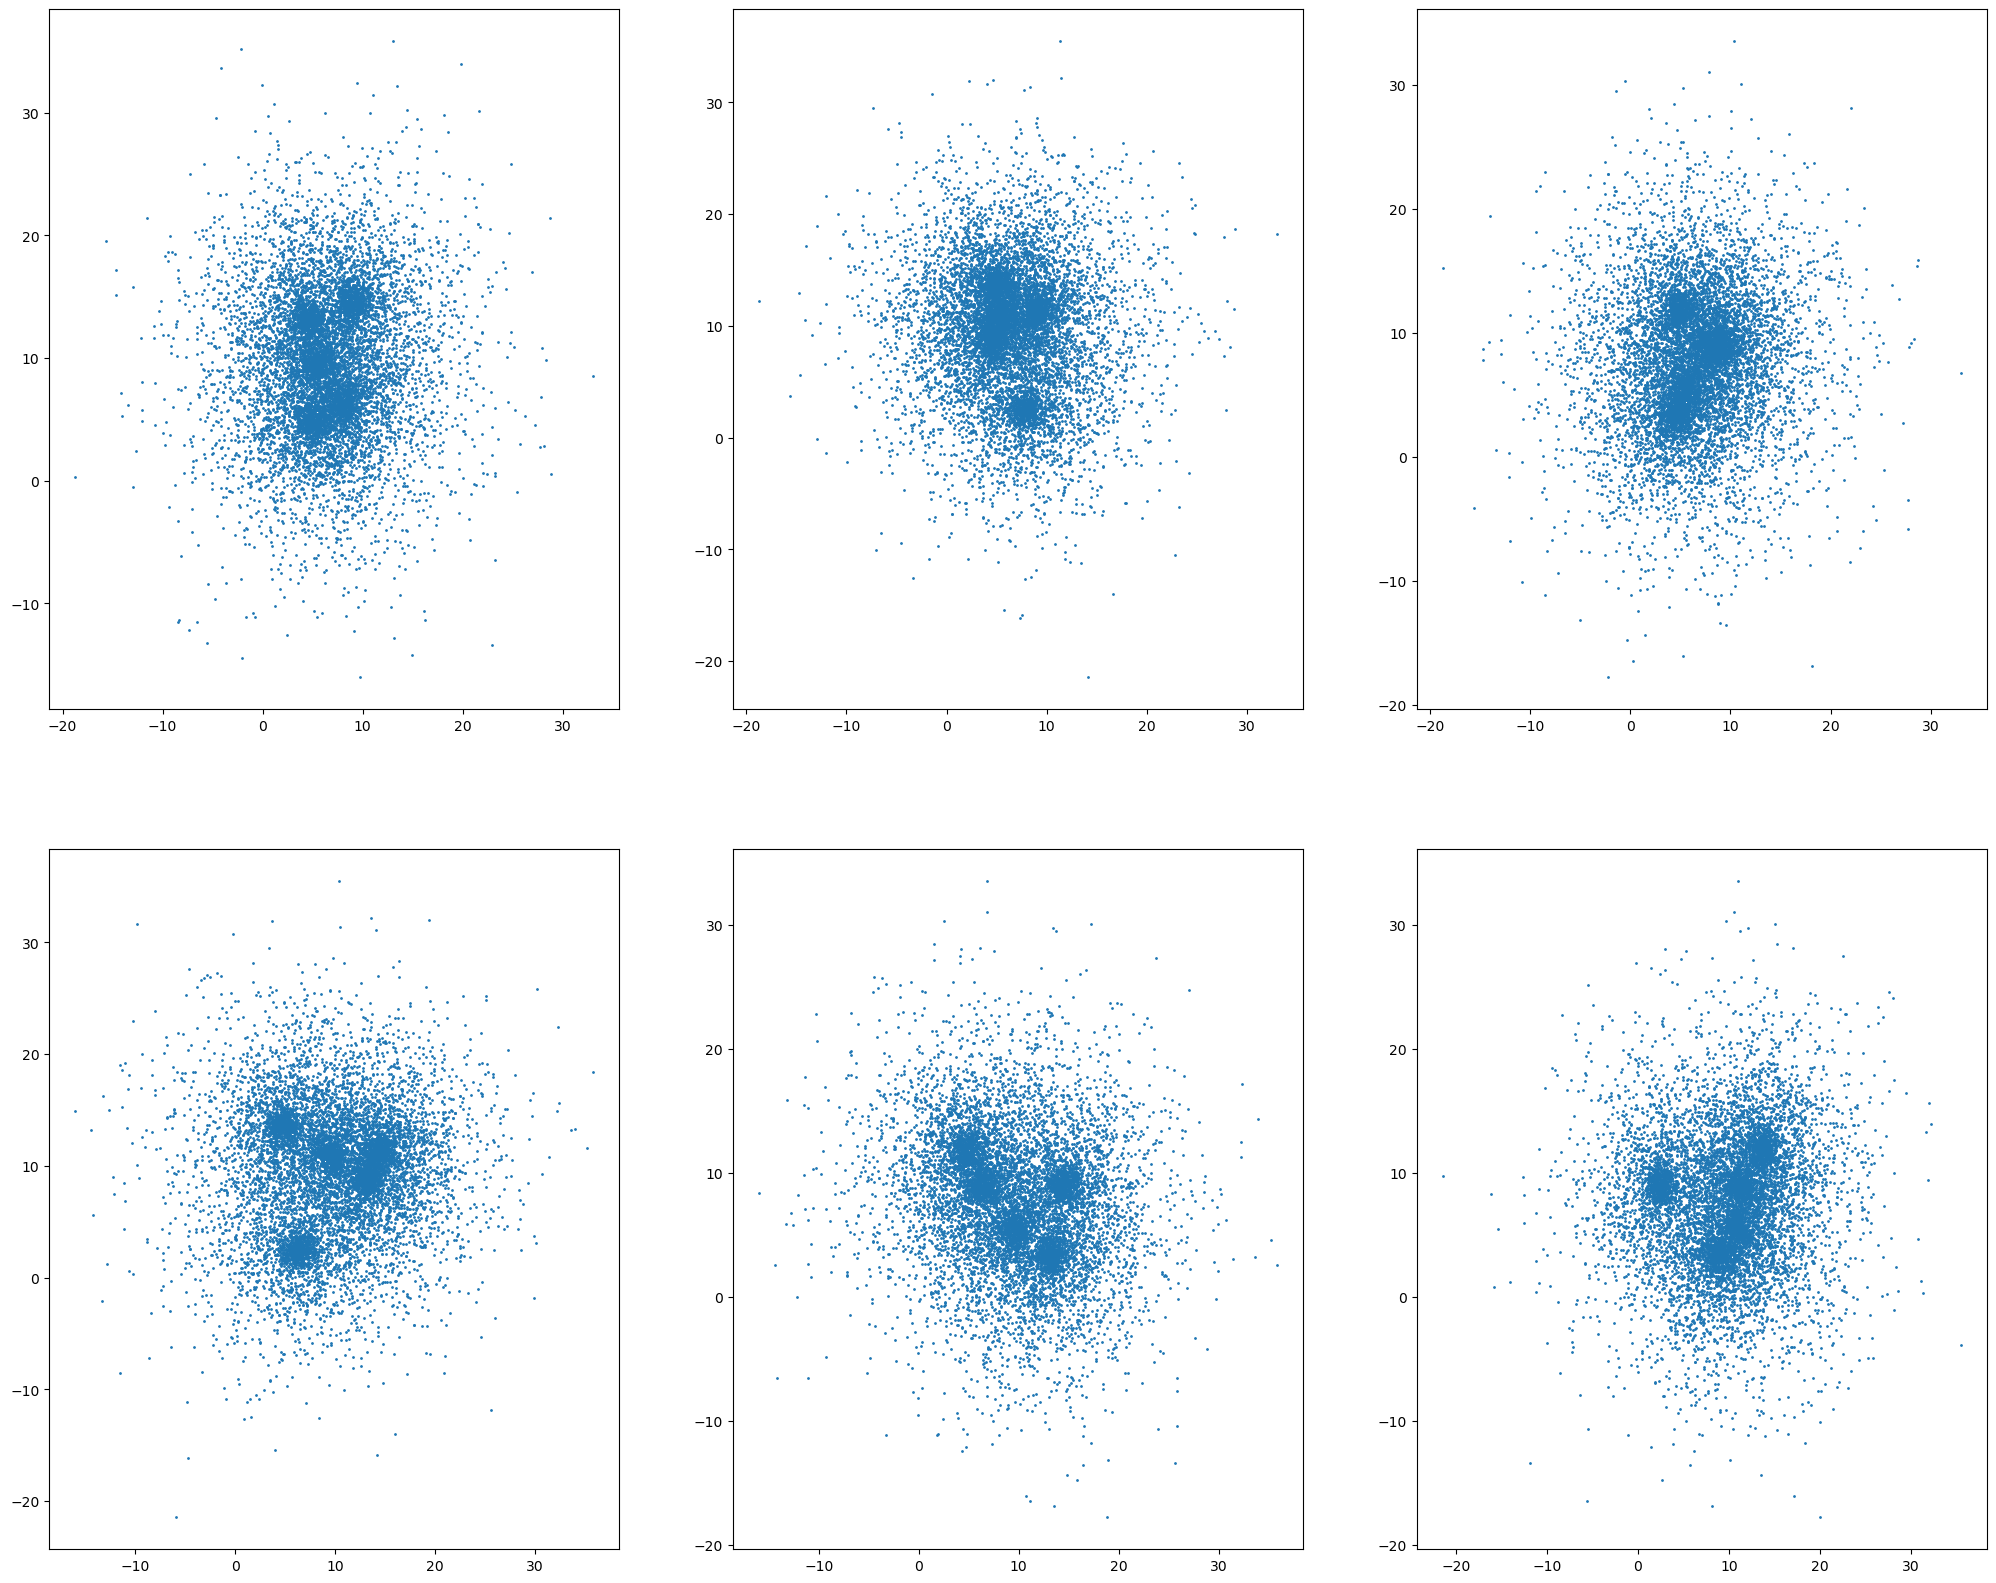

In [3]:
# Generate a 4D distribution of random points

max_sigma = 100
N = 5
n_samples = 500

loc_interval = (0, 15)

distx = np.array([])
disty = np.array([])
distk = np.array([])
distl = np.array([])

for i in range(N):
    xs, ys, ks, ls = sample_from_gaussian(max_sigma, loc_interval, n_samples)
    distx = np.append(xs, distx)
    disty = np.append(ys, disty)
    distk = np.append(ks, distk)
    distl = np.append(ls, distl)

plt.figure(figsize=(25, 20))
plt.subplot(2, 3, 1)
plt.scatter(distx, disty, s=1)

plt.subplot(2, 3, 2)
plt.scatter(distx, distk, s=1)

plt.subplot(2, 3, 3)
plt.scatter(distx, distl, s=1)

plt.subplot(2, 3, 4)
plt.scatter(disty, distk, s=1)

plt.subplot(2, 3, 5)
plt.scatter(disty, distl, s=1)

plt.subplot(2, 3, 6)
plt.scatter(distk, distl, s=1)

plt.show()

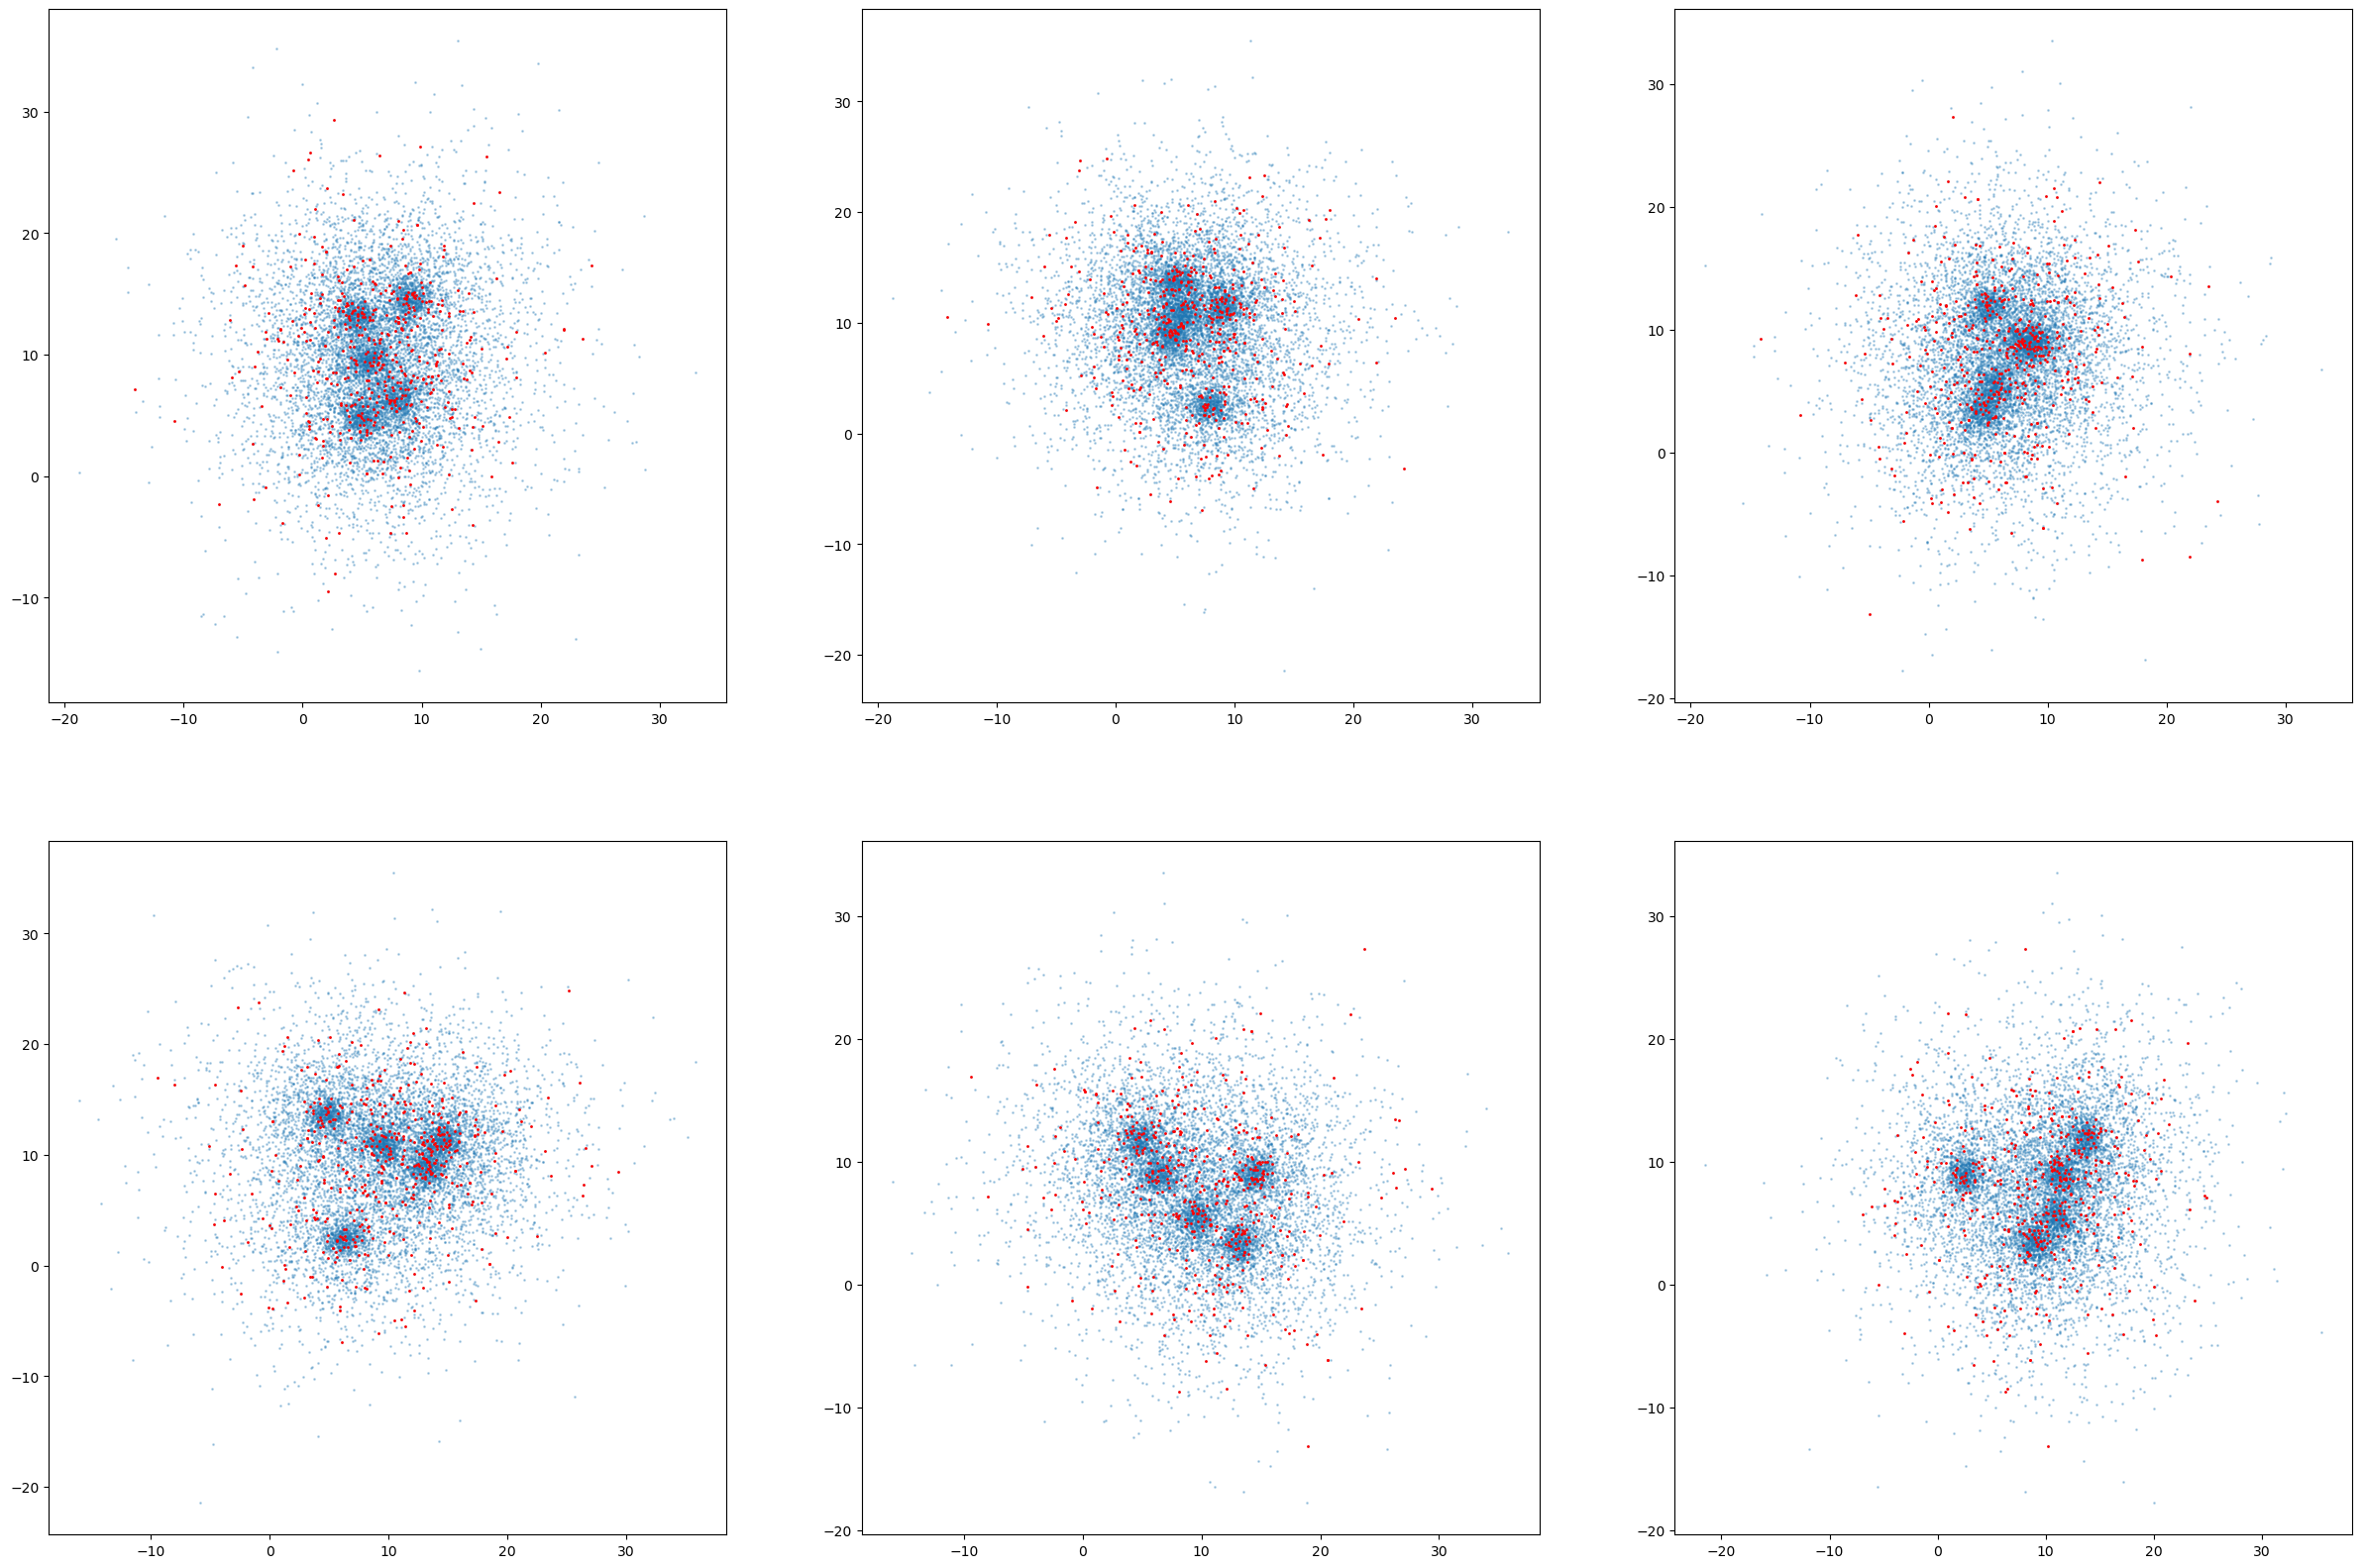

In [4]:
# Sample from image indexes:

metrics = [distx, disty, distk, distl]

idx_solutions = np.random.choice(np.arange(0, len(distx), 1), 500)

plt.figure(figsize=(30, 20))
plt.subplot(2, 3, 1)
plt.scatter(metrics[0], metrics[1], s=1, alpha=0.3)
plt.scatter(metrics[0][idx_solutions], metrics[1][idx_solutions], c='red', s=1)

plt.subplot(2, 3, 2)
plt.scatter(metrics[0], metrics[2], s=1, alpha=0.3)
plt.scatter(metrics[0][idx_solutions], metrics[2][idx_solutions], c='red', s=1)

plt.subplot(2, 3, 3)
plt.scatter(metrics[0], metrics[3], s=1, alpha=0.3)
plt.scatter(metrics[0][idx_solutions], metrics[3][idx_solutions], c='red', s=1)

plt.subplot(2, 3, 4)
plt.scatter(metrics[1], metrics[2], s=1, alpha=0.3)
plt.scatter(metrics[1][idx_solutions], metrics[2][idx_solutions], c='red', s=1)

plt.subplot(2, 3, 5)
plt.scatter(metrics[1], metrics[3], s=1, alpha=0.3)
plt.scatter(metrics[1][idx_solutions], metrics[3][idx_solutions], c='red', s=1)

plt.subplot(2, 3, 6)
plt.scatter(metrics[2], metrics[3], s=1, alpha=0.3)
plt.scatter(metrics[2][idx_solutions], metrics[3][idx_solutions], c='red', s=1)

plt.show()

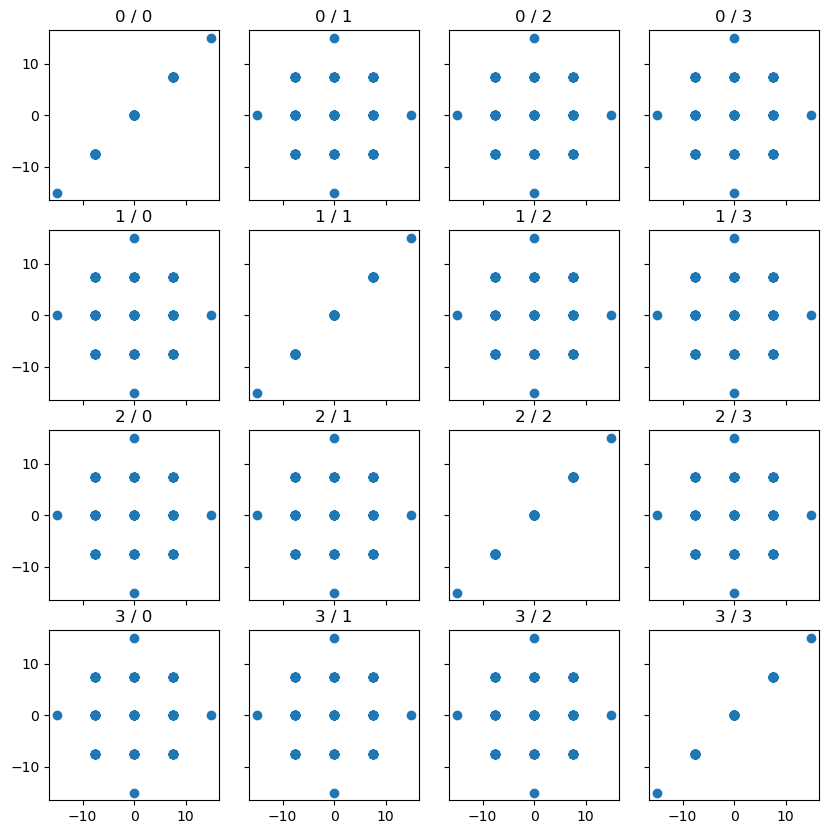

Approximating distribution...


100%|██████████| 10000/10000 [00:00<00:00, 12936.25it/s]


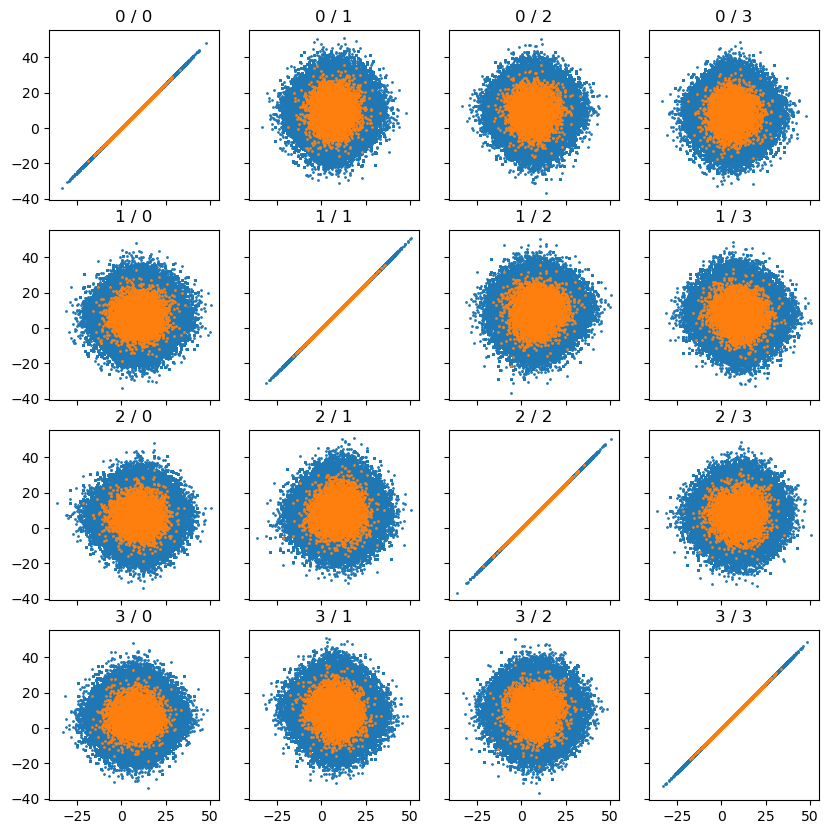

Drawing windows...


100%|██████████| 1/1 [00:00<00:00,  1.08it/s]


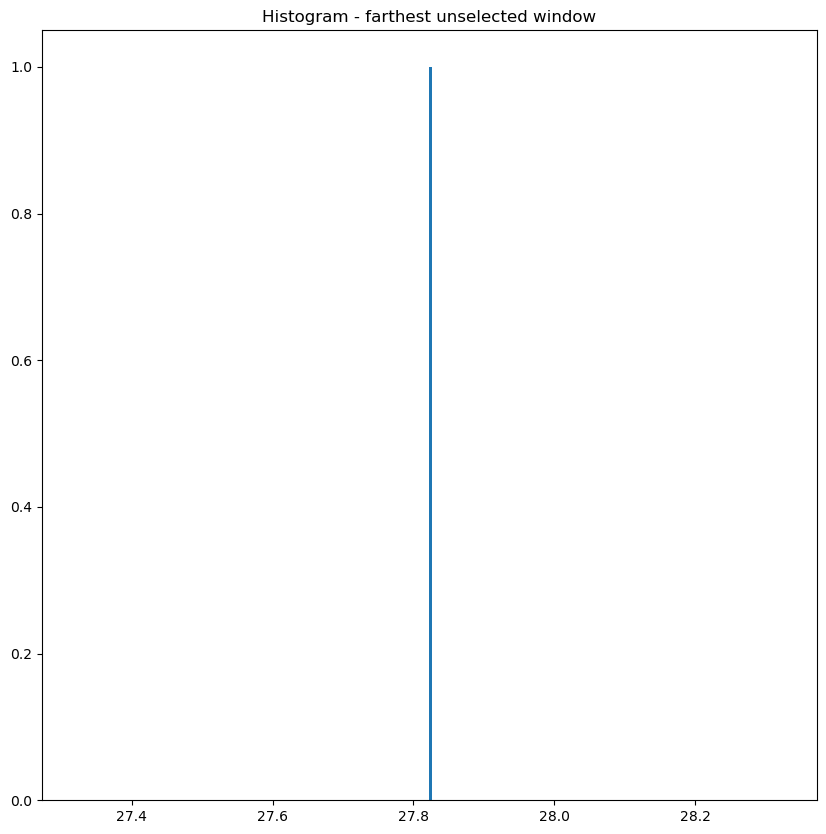

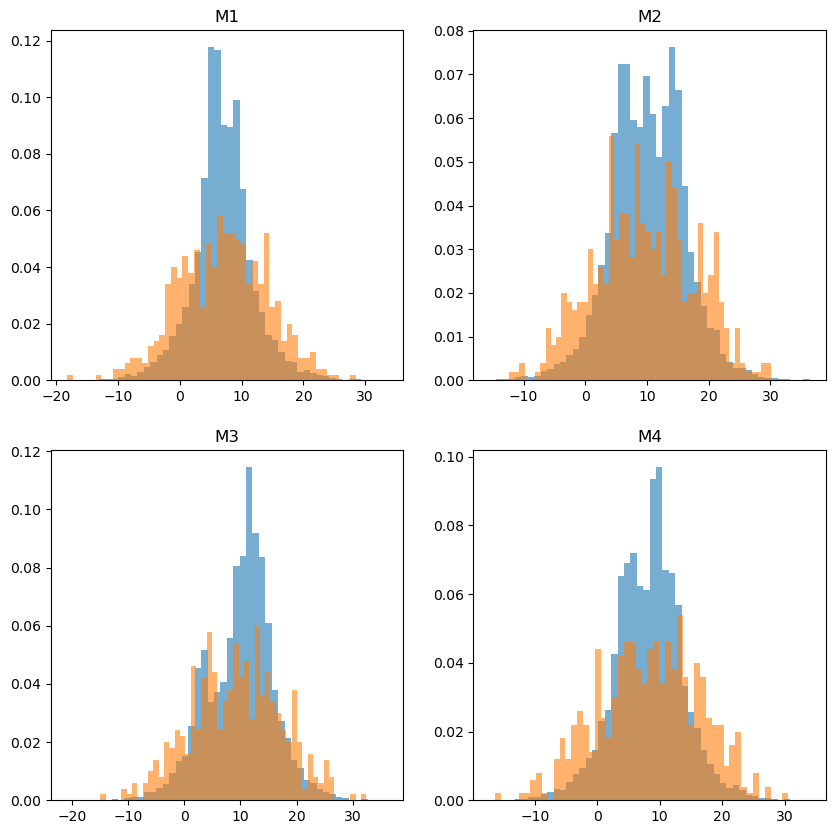

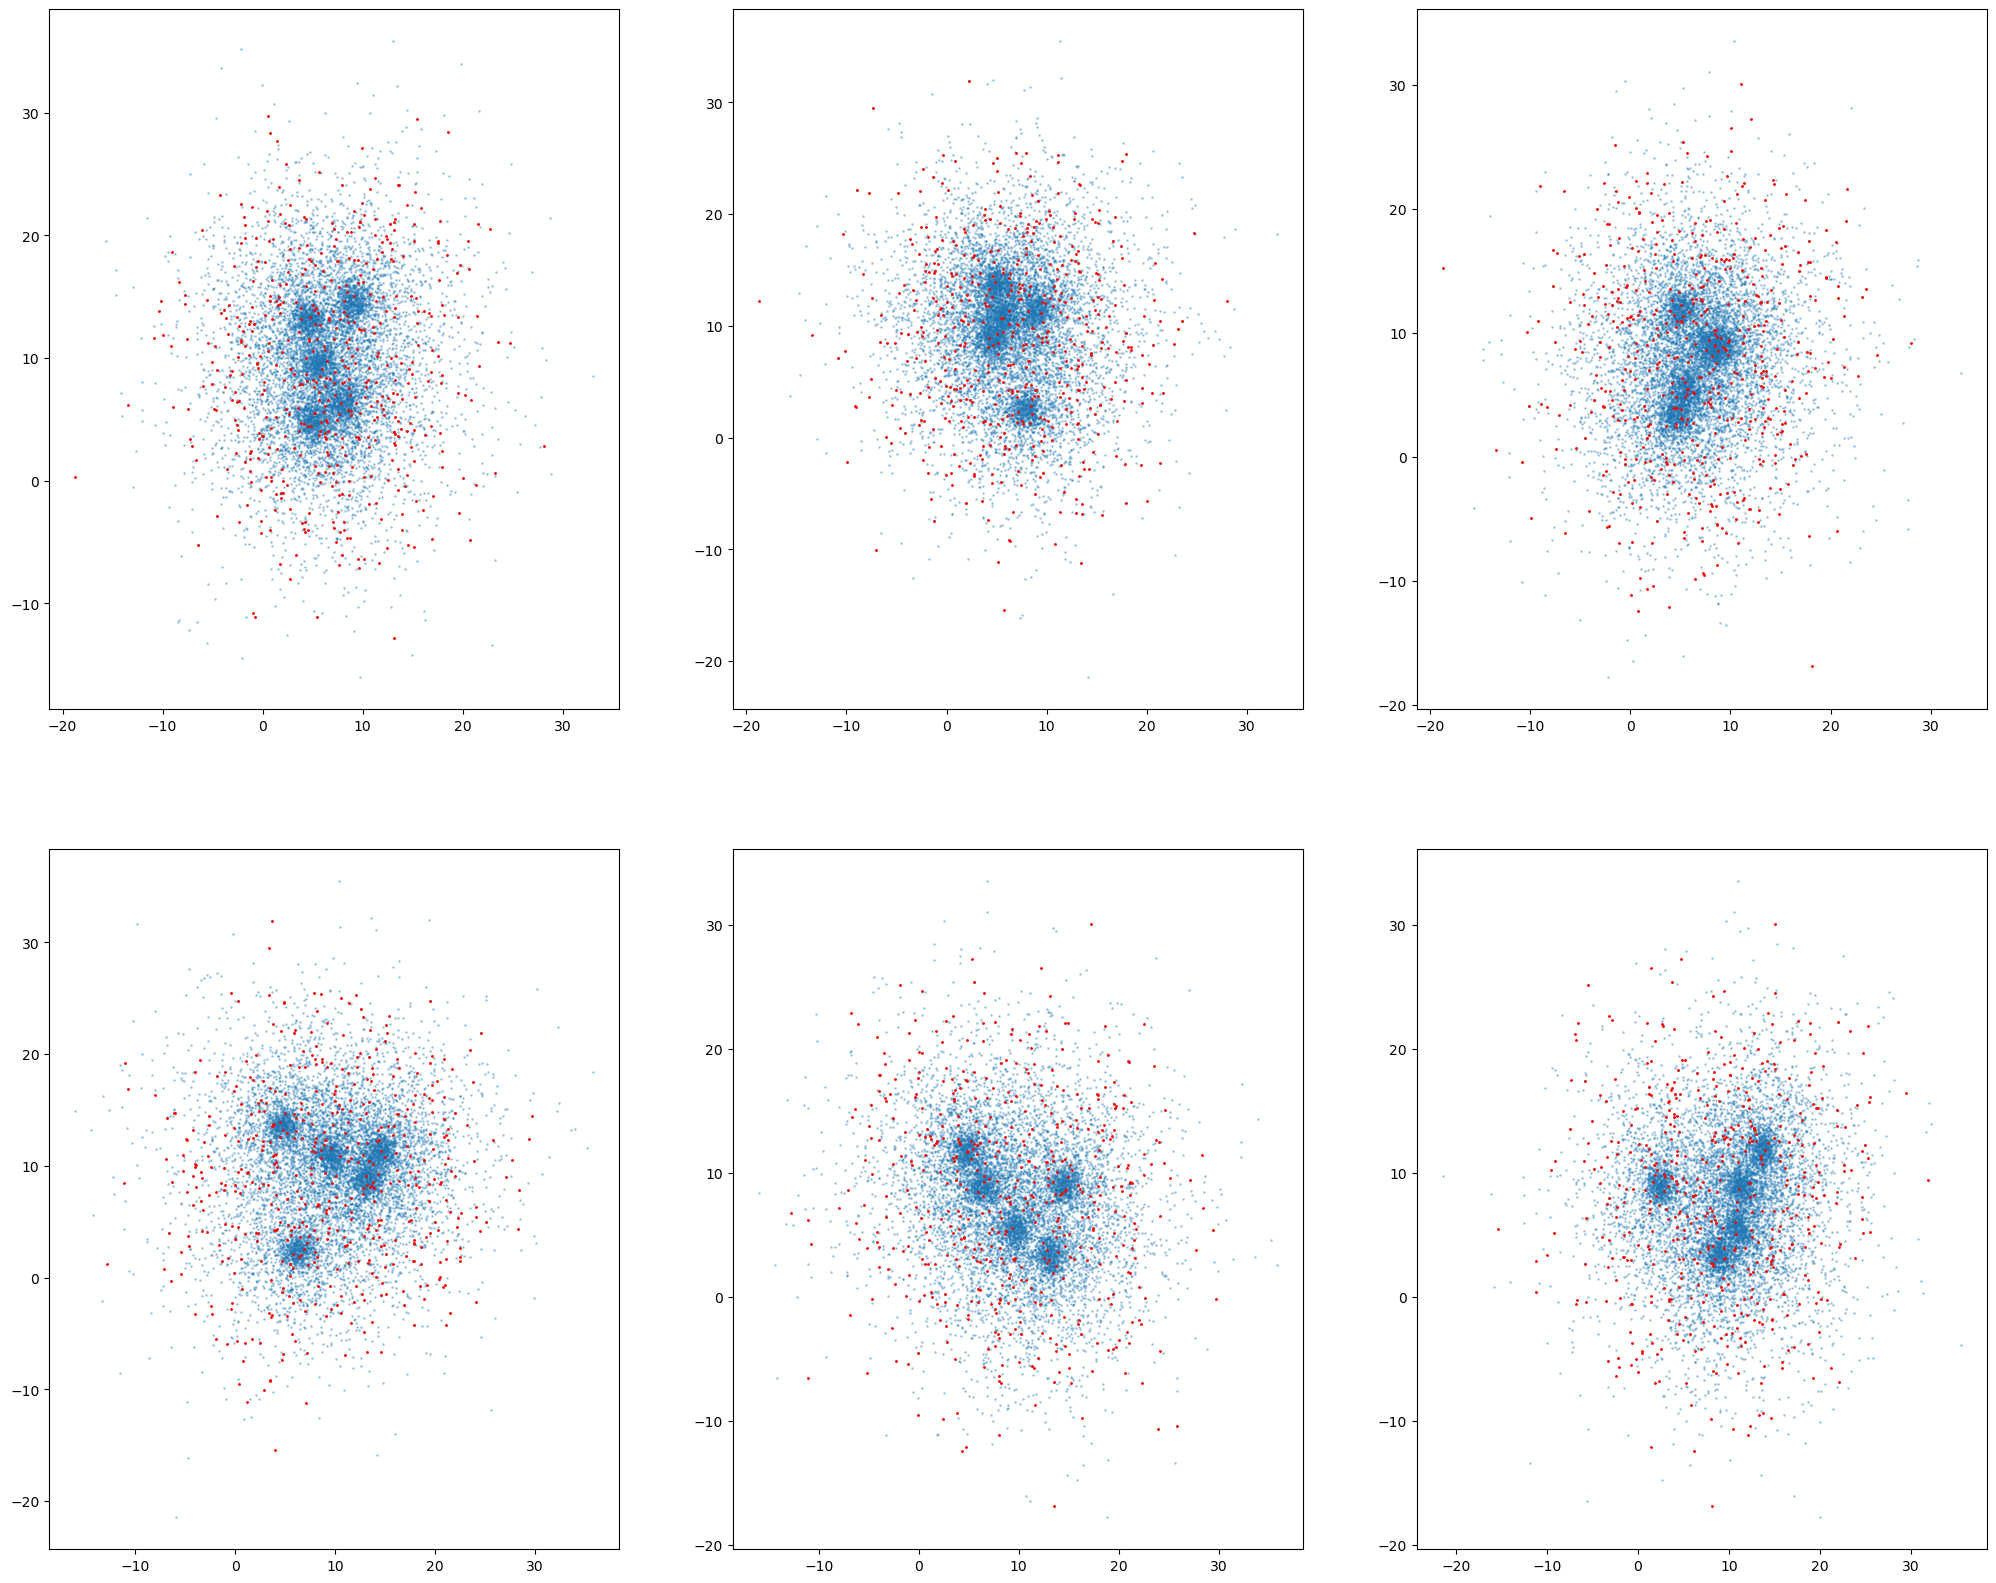

In [5]:
# Apply our sampling methodology to the generated data.

from image_selection import draw_sample_points

# Parameters
# -----------
radius = 15
density = 5
resample_resolution = 0.1
n_iter = 1
n_images = 500
root_folder = None
verbose = True
# -----------

solution = draw_sample_points(radius, density, resample_resolution, n_iter, n_images, metrics, verbose)